In [2]:
import pandas as pd 
import numpy as np 
from  matplotlib import pyplot as plt 

## Creating synthetic data 

In [29]:
X = np.array([[1,5],[2,6],[3,7], [2,1],[3,2],[4,4]])
X

array([[1, 5],
       [2, 6],
       [3, 7],
       [2, 1],
       [3, 2],
       [4, 4]])

In [4]:
Y = np.array([[0],[0],[0],[1],[1],[1]])
Y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

## Creating the functions 

In [5]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

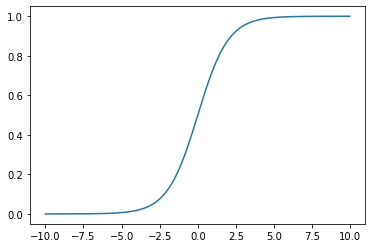

In [6]:
xval = np.arange(-10, 10, 0.04)
yval = [sigmoid(x) for x in xval ]
plt.plot(xval, yval)

In [7]:
min(yval)

np.float64(4.5397868702434395e-05)

In [8]:
max(yval)

np.float64(0.9999527494966711)

In [12]:
def gradient(X, Y, theta ):
    #our gradient here is derivative of the loss function which : ((1/n)* np.dot(x_T, (sigma_x_theta - y)))
    n = len(X)
    x_T = X.T
    sigma_x_theta = sigmoid(np.dot(X,theta))

    return ((1/n)* np.dot(x_T, (sigma_x_theta - Y)))

In [54]:
def cross_entropy_loss_function(Y, sigma) : 
    return -np.mean(Y*np.log(sigma) + (1-Y)*np.log(1 - sigma))

In [19]:
def feature_polynomial_expansion(features_data, power):
    transformed_features = np.empty((0, (power + 1) * (power + 2) // 2))  # general case for 2 vars
    
    for row in features_data:
        x1 = row[0]
        x2 = row[1]
        basis = []
        for i in range(power + 1):
            for j in range(i + 1):
                basis.append((x1 ** (i - j)) * (x2 ** j))
        transformed_features = np.vstack((transformed_features, np.array([basis])))
                  
    return transformed_features

## Logistic Regression Algorithm

In [63]:
def logistic_regression(X, Y, learning_rate, iterations, power = 1) : 

    # Our equation for optimization is : theta_new = theta - learning_rate ((1/n)* x.T * (sigma(x_theta) -y))

#To make the augemented theta vector we have these conditions  
    X = feature_polynomial_expansion(X, power) # These are my transformed features
    dimensions = len(X.T)
    theta = np.zeros((dimensions  ,1)) # this is my theta which is a column vector . can also be termed as theta.T
        
    loss = []

    for i in range(iterations):

        grad = gradient(X, Y, theta )
        print(grad.shape)
        theta -= learning_rate * grad

        #COMPUTE NEW LOSS 
        x_theta = np.dot(X,theta)
        sigma_x_theta = sigmoid(x_theta)

        loss.append(cross_entropy_loss_function(Y, sigma_x_theta))

    plt.plot(range(iterations), loss)
    print(f"The final loss turns out to be : {loss[-1]}")
    return theta

(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)

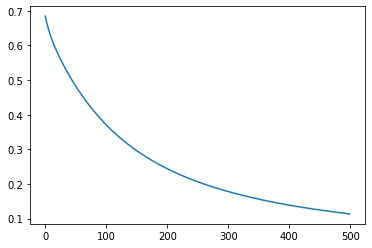

In [64]:
weights = logistic_regression(X, Y, 0.01,500, power = 1 )

In [60]:
print(weights)

[[ 0.26405228]
 [ 1.20869576]
 [-0.86321684]]


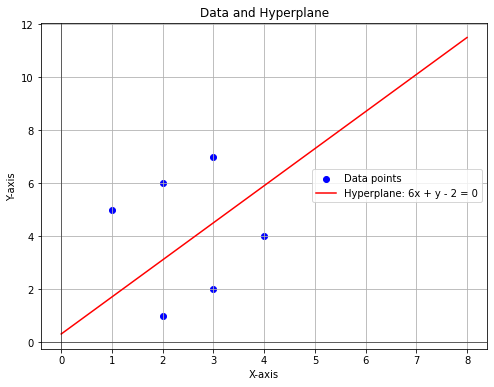

In [62]:
x = np.array([1,2,3,2,3,4])
y = np.array([5,6,7,1,2,4])

# Weight and bias (hyperplane parameters)

# Define x range around your actual data
x_vals = np.linspace(x.min() - 1, y.max() + 1, 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]

# Plot with larger figure
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_vals, y_vals, color='red', label='Hyperplane: 6x + y - 2 = 0')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data and Hyperplane')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()